<a href="https://colab.research.google.com/github/mariampinel/Deception-Detector/blob/main/ECS7020P_miniproject_2425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECS7020P- Mini Project: Building a Lie Detector Model

# 1 Author

**Student Name**:  Maria Martinez
**Student ID**:  240990523



# 2 Problem formulation
The problem we aim to solve in this project is predicting whether someone is lying or telling the truth in a narrated story. Specifically, the objective is to classify an audio recording of 30 seconds as either a truthful or deceptive story.

We are provided with a dataset containing 100 audio recordings, each 2 minutes long. These recordings are primarily in English but may include other languages. To train our model, we extract 30-second segments from these 2-minute recordings. The model is then tested on independent 30-second audio recordings to evaluate its ability to accurately predict whether a story is truthful or deceptive.

This problem is intriguing because of the diverse approaches available to solve it. While the dataset is audio-based, there are two main potential paths for feature extraction:

1. Audio-based feature analysis, focusing on characteristics of the sound signal itself.
2. Text-based feature analysis, which involves converting speech to text using speech recognition and applying natural language processing (NLP) techniques to analyze word patterns and linguistic features indicative of deception.

Initially, both audio and text-based analyses were considered. Text-based approaches aimed to extract features like speech rate, number of arguments, total word count, eloquence index (word-to-argument ratio), and disfluency index (interruptions, stutters, etc.) as suggested by Anolli & Ciceri (1997). However, mixed findings in the literature regarding the predictive power of text features in detecting deception led to the decision to focus on audio-based features. For example, studies have shown that factors like mean phrase duration, articulation rate, and language speed have limited impact in capturing emotional states or deception. Additionally, text-based analysis proved computationally demanding, which further supported the decision to focus solely on audio features.

The central hypothesis guiding this project is that lying is **cognitively demanding**.

Lying requires managing multiple cognitive tasks simultaneously, including constructing a plausible falsehood, maintaining the deception, and avoiding contradictory statements or "leakages" that might expose the truth. This cognitive load can affect a liar's behavior, speech patterns, and voice characteristics. For instance:

- Cognitive Conflict: Liars experience a conflict between their knowledge of the truth and the falsehood they are presenting, which taxes their mental capacity. This often results in observable changes in behavior and voice (Anolli & Ciceri, 1997).
- Physiological Changes: Increased cognitive strain can manifest as physiological changes, such as altered breathing patterns or vocal stress. For example, liars may have more frequent and shorter pauses during their speech (Elaad, 2014).

One experiment supporting this idea involved 30 male university students describing pictures while either lying or telling the truth. Digital audio analysis revealed that liars had shorter, more frequent pauses, reflecting the psychological and cognitive strain they were experiencing (Anolli & Ciceri, 1997). Other studies have corroborated these findings, showing that liars often display speech patterns indicative of cognitive load, such as increased pauses, reduced pitch variation, and altered speech fluency (Vrij et al., 2010).


**Key audio features identified for deception detection:**

- Pauses: Liars have more frequent and shorter pauses in their speech.
- Pitch Variation: Liars tend to have flatter frequency distributions, with lower variation in pitch.
- Speech Fluency: Liars are often less fluent and more prone to disfluencies (e.g., stuttering or repetition).
- Phrase Length: Liars tend to construct longer, more elaborate phrases to make their story seem believable.
- Intensity and Volume: Liars might exhibit emotional leakage (e.g., anger or stress) that affects vocal intensity and volume.
- Standard Deviations: Variability in selected features (e.g., pitch, volume, or pauses) can indicate cognitive strain and stress.


Therefore, by focusing on audio-based feature extraction and leveraging these insights into deceptive speech patterns, this project seeks to build a robust machine learning model capable of distinguishing between truthful and deceptive audio recordings. This approach combines theoretical findings on cognitive and behavioral markers of deception with practical techniques for audio signal analysis to solve a challenging and fascinating problem in the domain of deception detection.

# 3 Methodology

Describe your methodology. Specifically, describe your training task and validation task, and how model performance is defined (i.e. accuracy, confusion matrix, etc). Any other tasks that might help you build your model should also be described here.




**Approach**
The objective of this project is to predict whether a 30-second audio recording narrates a truthful or deceptive story. To achieve this, we focus on audio-based feature extraction and machine learning models trained to classify the recordings into binary categories: truthful (0) or deceptive (1).

Our methodology consists of the following key steps:

1. **Data Preparation**: This stage involves the extraction 30-second segments from 2-minute recordings to create training, validation, and test datasets.

The dataset consists of 100 recordings of 2 minutes each, segmented into 30-second chunks. These segments are split into:
- Training Set: 80% of the data, used to train the models.
- Validation Set: 20% of the training data, used for model tuning and evaluation.
- Test Set: 20% of the original dataset, used for final performance evaluation.

2. **Feature Extraction**: Here we engineer the hypothesized features from the audio recordings based on behavioral and cognitive markers of deception.
From each audio segment, we extract computationally efficient features using the Librosa library:
    1. MFCCs (Mel-Frequency Cepstral Coefficients): MFCC is a feature extarction techinque for audio signal processing. The audio is loaded as a 1D array of values. These values describe the acoustice pressure of sound at a certain time. Hence, each audio recording or 'audio sample' is made up of multiple samples, each representing the acoustic pressure value. 2 MFCC features are extracted for each sample.

    2. Pitch Statistics: Mean and standard deviation of pitch to reflect vocal monotonicity or tension.

    3. Pause Analysis: Number and average duration of pauses, which give a measure of speech disfluency.

  These features align with research indicating that lying induces cognitive strain, leading to altered speech patterns and vocal characteristics.

3. **Model Training and Validation**: Training multiple machine learning models and evaluating them using cross-validation to optimize performance.

The cross-validation is done in this section. The technique used during training is k-fold cross-validation, to ensure robustness and class balance. Although initial analysis shows that the dataset is balanced, k-fold cross-validation is particularly beneficial for small datasets or potential future training on larger, imbalanced datasets. This method splits the training data into k subsets, iteratively using one subset for validation while training on the remaining subsets, ensuring all samples are used for both training and validation. Additionally, this technique reduces the risk of overfitting.

We train 4 models to select the best model or the best combination of models. These selection is extracted from commonly used models for audio analysis in Machine Learning. Given that different studies report different accuracies for each, 4 models are tested individually and a fifth combined model is tested to see if a cmobination of different methods might provide a better fit for deception-specific data.

  1. Support Vector Machine (SVM): Supervised machine learning algorithm that uses kernel functions to transform the data from higher-dimensional space to allow linear separation.
  2. Random Forest and Extra Trees Classifiers: Ensemble tree-based methods. They are chosen since they are robust against overfitting and can capture complex patterns.
  3. k-Nearest Neighbors (kNN): Non-parametric model that attributes a label to a sample, based on the labels of the closest samples to it. Distance used is the Euclidean distance
  4. Convolutional Neural Network (CNN): Sequential model designed for one-dimensional feature arrays, such as audio data in this case.

  5. Voting Classifier: This model combines the previous 4 model outputs through strict majority voting. This model uses ensemble techniques to improve classification accuracy.

4. **Model Performance Metrics**: The metrics used to determine model performance are: accuracy, precision, recall, F1 score, and confusion matrices


# 4 Implemented ML prediction pipelines
- Input: The input to the pipeline is audio data in the form of 2 minutes from a deception dataset, which are divided into 30 second segments for training and input of the models.
- Output: The output is a binary classification: whether the speaker in the audio is lying (1) or telling the truth (0).

Stages of the Pipeline:

First, before the transformation stage, the raw 2 minute audio files are divided first into a training, validation and testing dataset. Each of those datasets is then processed to extract 30 second audio segments, independent from each other. These 30 second audio segments are the inputs in the transformation stage, from which the features for are extracted for prediction.

**4.1 Transformation Stage**

Objective: Convert raw audio data into meaningful features for model training.

Input:
- Raw audio data (30 second audios).
- Train, validation, and test audio paths.

Process:
- Segment extraction: Split the original audio into 30-second segments, ensuring the data is independent and identically distributed (IID).
- Feature extraction: Using audio file paths (X_train, X_valid, X_test),  extracted feature arrays (MFCC, pitch mean, pitch std, etc.) are obtained for each 30-second segment.

Output: Processed feature arrays ready for model input.

**4.2 Model Stage**

Objective: Train and evaluate machine learning models for binary classification (truth vs. lie).

Input: Features from the transformation stage (MFCCs, pitch statistics, pause information). Features had corresponding labels (truth = 0, lie = 1).

Models Used:
  - Support Vector Machine (SVM): A linear classifier for high-dimensional data.
  - Random Forest and Extra Trees: Ensemble models for handling non-linearity and complex relationships in data.
  - k-Nearest Neighbors (kNN): A non-parametric method for classifying based on proximity to nearest data points.
  - Convolutional Neural Network (CNN): Used for learning spatial hierarchies in the audio feature representations.

Process:
  1. Train models on the training set.
  2. Validate models using the validation set.
  3. Evaluate model performance on the test set.

Intermediate Data Structures: model predictions (train_preds, validation_preds, test_preds); and metrics for performance evaluation (accuracy, precision, recall, F1 score).
Output: Model predictions and performance metrics.

**4.3 Ensemble Stage:** Combines the outputs of multiple models to improve classification accuracy.

Summary

4.1 Transformation: Raw audio segments are processed into meaningful features (MFCC, pitch, pauses).
4.2 Model: Individual machine learning models (SVM, Random Forest, Extra Trees, kNN, CNN) are trained and evaluated.
4.3 Ensemble: Predictions from each model are combined using majority voting to improve performance.

## 4.1 Transformation stage

In the Transformation Stage, the raw audio data is preprocessed and transformed into usable features for machine learning models. The data undergoes several important steps to ensure that it is properly formatted for training and validation.

- Data Splitting:

The original dataset is divided into Training (80%) and Test (20%) sets. The Training Set (TrainSet) is then further split into training and validation datasets:
The Training Set (TrainSet) is split such that 75% of it is used for training and 25% for validation.
This ensures that the model is trained on a large portion of the data and validated on a separate subset to avoid overfitting.

- Audio Preprocessing:

Segmentation: Audio files are split into 30-second segments to break down the lengthy audio into smaller, manageable pieces for training. This segmentation is crucial to capture relevant features within a fixed time frame.
Audio Segment Filtering: Segments shorter than 30 seconds are discarded to ensure uniformity across all training samples. The goal is to have consistent input for each model, ensuring a reliable performance evaluation.

- Overlap Consideration:

Overlap was initially considered, where consecutive 30-second segments would share part of their content to provide continuity. However, after further consideration, overlap was removed from the pipeline because each input audio segment needs to be classified independently, with no additional context from adjacent segments. Introducing overlap would risk overfitting, as the model could learn to rely on redundant information, leading to a reduction in generalization ability and accuracy.

- Feature Extraction:

    **Audio Features:**
After segmentation, the following audio features are extracted from each 30-second segment:
    - MFCCs (Mel Frequency Cepstral Coefficients): Used to represent the speech spectrum and capture important speech characteristics.
    - Pitch and Voiced Features: These capture tonal features and vocalizations that might indicate emotional or cognitive changes in speech.
    - Pause Detection: The length and frequency of pauses within the speech, which might help detect cognitive strain, especially when lying.
    - Silence Detection: Identifies moments of silence in the audio, which might correlate with hesitation or uncertainty in speech.

Data Normalization: Features are standardized or normalized to ensure they are on the same scale and avoid certain features dominating the model due to their larger numerical values. This step is needed to later employ models like SVM and KNN, which are sensitive to feature scaling.

Final Output: The output of the transformation Stage is a set of preprocessed and feature-engineered data, which includes
1. Extracted Features: The 30-second audio segments with the corresponding extracted features.
2. Labels: Each extracted 30-second audio segment is extracted along with its encoded associated label 0 or 1. 1 indicates Deception and 0 is Truth.

3. Training and Validation Data: The segments are ready to be used in model training and are formatted as arrays suitable for machine learning models.

In [162]:
# Extraction function
def extract_features(file_path, scale_audio=False, sr=22050):
    # Load the audio file (30 seconds duration)
    x, fs = librosa.load(file_path, sr=sr, duration=30.0)

    if scale_audio:
      x = (x - np.mean(x)) / np.std(x)
        # x = x / np.max(np.abs(x))  # Normalize audio

    # Extract pitch and voiced features (harmonic part)
    f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=80, fmax=450, sr=fs)

    # Power and pitch statistics
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0)) < 1 else 0
    pitch_std = np.nanstd(f0) if np.mean(np.isnan(f0)) < 1 else 0

    # Silence detection (pause features)
    silent_ranges = librosa.effects.split(x, top_db=30)
    num_pauses = len(silent_ranges)
    avg_pause_duration = np.mean([end - start for start, end in silent_ranges]) / fs

    # Extract MFCCs (Mel-frequency cepstral coefficients)
    mfccs = librosa.feature.mfcc(y=x, sr=fs, n_mfcc=5)
    mfccs_mean = np.mean(mfccs, axis=1)  # Mean of the first 5 MFCC coefficients
    mfccs_std = np.std(mfccs, axis=1)  # Standard deviation of the first 5 MFCC coefficients

    # Combine the reduced set of features
    features = np.hstack([mfccs_mean, mfccs_std, pitch_mean, pitch_std, num_pauses, avg_pause_duration])

    return features


def segment_feature_extraction(segment_paths):
    features = []
    for segment_path in segment_paths:
        features.append(extract_features(segment_path))
    features = np.array(features)
    return features


## 4.2 Model stage

The models used for prediction in this project are:
1. Support Vector Machine (SVM):

SVM is a supervised machine learning algorithm widely used for classification tasks. It helps find the optimal boundary that separates different classes (in this case, truth vs. lie) in the feature space. The reason to use SVM is that it performs well with high-dimensional data, such as audio features, and is effective even when there is a small margin between classes.

2. Random Forest and Extra Trees Classifiers:

These are ensemble tree-based methods, meaning they use multiple decision trees to make predictions. Random Forest is known for being robust to overfitting, which is important when dealing with complex audio data that might have noisy or irrelevant features. Extra Trees also provide randomness to avoid overfitting, and both models are great at capturing non-linear relationships in the data, making them suitable for predicting deception in varied contexts.

3. k-Nearest Neighbors (kNN):

kNN is an algorithm that classifies samples based on the majority class of its closest neighbors in the feature space. It is used because it is efficient when varibles or features are similar, which was possible to be the case with audio features of lies. It’s a non-parametric method, so it doesn’t make assumptions about the data. Hence, it allows to recognize patterns that are hard to describe explicitly, like detecting deception in voice patterns.

4. Convolutional Neural Network (CNN):

Even though we have not gone through them in this class, I found them widely used and applied when working with one-dimensional audio feature arrays. CNNs learn relevant features from the audio data, such as patterns in the frequency spectrum, which might help detect deception based on subtle changes in speech. Given that the audio data involves sequential information, CNNs is a well-suited method for identifying local patterns over time.

## 4.3 Ensemble stage

As an ensemble approach, a voting classifier has been used. Given that the number of samples used for training was so small, and there can be huge variability in voices and story-telling patterns, the idea of this project was to test which models would provide the best fit to the features extracted from the audio segments and finally to combine them into an aggregated model.

Therefore, a voting classifier was used. This model combines the previous 4 model outputs through strict majority voting. This model uses ensemble techniques to improve classification accuracy.

The Voting Classifier combines predictions from multiple models (SVM, CNN, Extra Trees) to improve accuracy. It uses hard voting, where the final prediction is based on the majority vote from all models. For each sample, if most models predict "lie" (1), the ensemble predicts "lie", and vice versa for "truth" (0).

This ensemble method enhances performance by mitigating the weaknesses of individual models, ensuring more reliable predictions. By combining different approaches, it allows to capture a wider range of features in the data. This technique also helps to reduce errors and improve accuracy.

# 5 Dataset
For the model development and evaluation, the dataset used is based on the MLEnd Deception Dataset, which contains audio recordings of stories, some true and some deceptive. The goal is to predict whether the speaker is telling the truth or lying, based on audio features extracted from 30-second segments of the original 2-minute recordings.
Data Splitting

We will create the following datasets for training and evaluation:

1. Training Set: 80% of the original dataset is used for training.
2. Validation Set: 25% of the training set (20% of the original dataset) is set aside for validation to tune hyperparameters and evaluate model performance during training.
3. Test Set: 20% of the original dataset is used for final testing after training the model.

We ensure that the samples in these datasets are independent and identically distributed (IID) by using stratified splitting, which guarantees that the proportion of truth and lie samples is preserved across the datasets. This helps in maintaining the class balance and ensures the model is not biased towards any class.

- Segment Creation:

To avoid any potential overfitting from using long sequences, each audio file is broken into 30-second segments. This process is important for training models with consistent input sizes and for creating datasets with meaningful examples. We ensure that these 30-second segments are randomly selected and represent diverse contexts within the original audio recordings.

- Overlapping Segments: Initially, the idea was to use overlapping segments, which would allow the model to capture context from adjacent audio. However, this was discarded becaues to the potential for overfitting, as it would may introduce more than one prediction for the same context, which could reduce the model’s generalizability.

**Feature Extraction:**
Initially, the Harmonic/Percussive Component Separation (HPSS) and Harmonics Plus Noise Model (HNM) were considered as features. However, it was impossible to extract them because extracting the features for each segment had a high computational cost and the computer would keep crashing. However, with more computer power, it would be very interesting to see whether those features can help imporve the model's quality.

Consequently, th features used for model training are extracted from the MFCC (Mel Frequency Cepstral Coefficients), which is robust for speech recognition tasks, along with external features found for audio analysis related to the number of pauses in speech. The dataset will include:

- MFCCs: These capture the timbral texture of the audio and are widely used in speech recognition tasks for capturing the vocal characteristics of speech.

We use librosa for feature extraction, which includes functions for Harmonic/Percussive Component Separation (HPSS) and MFCC computation. The features extracted for each 30-second segment include statistical values such as mean and standard deviation of the MFCCs and the harmonic components.


In [163]:
# Import necessary packages
!pip install pydub
! pip install numpy librosa matplotlib
! pip install tensorflow

from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import librosa.display
import math
import random

from pydub import AudioSegment
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout
from tensorflow.keras.utils import to_categorical


In [164]:
#Install library - make sure you have version 1.0.0.4
%%capture
!pip install mlend==1.0.0.4


In [165]:
#Import library and functions
%%capture
import mlend
from mlend import download_deception_small, deception_small_load

In [166]:
#Download small data
datadir = download_deception_small(save_to='MLEnd', subset={}, verbose=1, overwrite=False)


100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|100\100|00100.wav
Done!


In [167]:
#Read file paths
TrainSet, TestSet, MAPs = deception_small_load(datadir_main=datadir, train_test_split=0.8, verbose=1, encode_labels=True)


Total 200 found in MLEnd/deception/MLEndDD_stories_small/


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [168]:
# Extract file paths (X) and labels (y) from TrainSet
X_train_full = np.array(TrainSet['X_paths'])  # Full training file paths
y_train_full = np.array(TrainSet['Y_encoded'])  # Corresponding labels

X_test = np.array(TestSet['X_paths'])
y_test = np.array(TestSet['Y_encoded'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [169]:
# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.25,  # 25% of TrainSet goes to Validation
    stratify=y_train_full,
    random_state=42
)


In [170]:
# Break down files into 30s files- 1) For training set, 2) for validation set 3) for test set

def extract_segment(file_path, segment_length=30*1000):
    audio = AudioSegment.from_file(file_path)
    total_length = len(audio)

    # Make sure the total length is greater than or equal to the segment length
    if total_length < segment_length:
        raise ValueError(f"Audio file {file_path} is shorter than the segment length.")

    # Randomly pick a starting point for the 30-second segment
    start_time = random.randint(0, total_length - segment_length)
    end_time = start_time + segment_length

    segment = audio[start_time:end_time]

    # Save the extracted segment
    output_file = f"{file_path[:-4]}_random_segment.wav"
    segment.export(output_file, format="wav")

    audio = None  # Explicitly delete to free up resources


    return output_file



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [171]:
# Step 2: Generate 30-second segments for each dataset
def generate_segments_and_labels(file_paths, labels, num_segments=1):
    segment_paths = []
    segment_labels = []

    for file_path, label in zip(file_paths, labels):
      for _ in range(num_segments):
          # Extract a random 30-second segment
          segment = extract_segment(file_path, segment_length=30*1000)
          # Append the segment and its corresponding label
          segment_paths.append(segment)
          segment_labels.append(label)


    return segment_paths, segment_labels

In [172]:
# Generate 30-second segments for each dataset - PUT THIS PART AT THE END. JUST BEFRO RUNNING MODEL
X_train_segments, y_train_segments = generate_segments_and_labels(X_train, y_train)
X_valid_segments, y_valid_segments = generate_segments_and_labels(X_valid, y_valid)
X_test_segments, y_test_segments = generate_segments_and_labels(X_test, y_test)


<ipython-input-170-696713d11b4d>:4: ResourceWarning: unclosed file <_io.BufferedReader name='MLEnd/deception/MLEndDD_stories_small/00058.wav'>
<ipython-input-170-696713d11b4d>:19: ResourceWarning: unclosed file <_io.BufferedRandom name='MLEnd/deception/MLEndDD_stories_small/00058_random_segment.wav'>
<ipython-input-170-696713d11b4d>:4: ResourceWarning: unclosed file <_io.BufferedReader name='MLEnd/deception/MLEndDD_stories_small/00083.wav'>
<ipython-input-170-696713d11b4d>:19: ResourceWarning: unclosed file <_io.BufferedRandom name='MLEnd/deception/MLEndDD_stories_small/00083_random_segment.wav'>
<ipython-input-170-696713d11b4d>:4: ResourceWarning: unclosed file <_io.BufferedReader name='MLEnd/deception/MLEndDD_stories_small/00014.wav'>
<ipython-input-170-696713d11b4d>:19: ResourceWarning: unclosed file <_io.BufferedRandom name='MLEnd/deception/MLEndDD_stories_small/00014_random_segment.wav'>
<ipython-input-170-696713d11b4d>:4: ResourceWarning: unclosed file <_io.BufferedReader name='M

# 6 Experiments and results

In this section we have tested 6 models in total:

1. SVM (Support Vector Machine):
- Validation Accuracy: 0.43, Validation F1 Score: 0.43
- Test Accuracy: 0.50, Test F1 Score: 0.52
- Analysis: The SVM model performs reasonably well with a 50% test accuracy, showing its ability to distinguish between truths and lies. While its precision (0.52) is slightly better than recall (0.50), it still indicates some room for improvement, especially in handling false negatives.

2. CNN (Convolutional Neural Network):
- Test Accuracy: 0.40, Test Precision: 0.58, Test Recall: 0.50, Test F1 Score: 0.54
- Analysis: The CNN model has a relatively low accuracy (40%), but the precision (0.58) and recall (0.50) are higher compared to accuracy. This suggests that the model may perform better in identifying true positive cases (i.e., when the model correctly identifies a lie), but struggles with false positives, lowering its overall accuracy.

3. Random Forest:
- Validation Accuracy: 0.45, Test Accuracy: 0.40
- Test Precision: 0.55, Test Recall: 0.40, Test F1 Score: 0.40
- Analysis: The Random Forest model performs similarly to CNN with moderate precision (0.55) and low recall (0.40). It struggles with accurately classifying the minority class (deceptive stories), which is reflected in the lower recall and F1 score.

4. Extra Trees Classifier:
- Validation Accuracy: 0.52, Test Accuracy: 0.35
- Test Precision: 0.55, Test Recall: 0.35, Test F1 Score: 0.30
- Analysis: The Extra Trees model performs well during validation (52% accuracy), but its test accuracy drops significantly to 35%. It has a relatively high precision (0.55) but very poor recall (0.35), meaning it is less reliable for predicting lies, potentially overfitting to the training data.

5. kNN (k-Nearest Neighbors):
- Validation Accuracy: 0.55, Test Accuracy: 0.50
- Analysis: kNN shows the best performance in terms of validation accuracy (55%) and performs consistently on the test set with 50% accuracy. It is competitive with other models and doesn't suffer from significant overfitting, but there’s still a gap in terms of distinguishing between classes.

6. Combined Model:
- Test Accuracy: 0.45, Precision: 0.66, Recall: 0.45, F1 Score: 0.44
- Analysis: The combined model shows a slight improvement in precision (0.66) compared to individual models but still struggles with recall. The balanced F1 score (0.44) suggests that the ensemble approach helps marginally, but the overall performance remains moderate.

For this model, the recall, precision and f-1 scores suggest that it is better at identifying lies when it predicts them (it has higher precision) but fails to identify a significant proportion of them (low recall value). The accuracy and F1 score suggest that improvements are needed to increase both the precision and recall balance, and further tuning of the features or the model might be required to optimize performance.

**Conclusions:**

- The SVM and kNN models seem to perform the best in terms of overall accuracy and balanced prediction.
- CNN and Random Forest show better results in precision but result in low values  in terms of recall, highlighting a trade-off between precision and recall.
- The Extra Trees Classifier performed poorly on the test set, indicating potential overfitting.
- The combined model improves precision but still shows room for improvement in recall, indicating that the combination of models offers a small advantage, but further tuning or feature engineering is needed for better classification performance.

## MODEL 1: SVM


In [173]:

# Extract features for each dataset - Put at the end
# Step 1: Extract features for the entire dataset (once, before K-fold cross-validation)
X_train_features = segment_feature_extraction(X_train_segments)
X_valid_features = segment_feature_extraction(X_valid_segments)
X_test_features = segment_feature_extraction(X_test_segments)

In [176]:
print(f"X_train_flat shape: {X_train_features.shape}")
print(f" X_valid_flat shape: {X_valid_features.shape}")
print(f" X_test_flat shape: {X_test_features.shape}")


X_train_flat shape: (60, 14)
 X_valid_flat shape: (20, 14)
 X_test_flat shape: (20, 14)


In [177]:
# Model 1: Support Vector Machine (SVM)
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
# Step 2: Flatten the extracted features for SVM

# Ensure y_train_segments is a numpy array (flatten it if necessary)
y_train_segments = np.array(y_train_segments)

# Ensure the features are 2D (samples, features) for SVM. If they are 3D, flatten them for SVM.
if len(X_train_features.shape) == 3:
    # If features have 3 dimensions (samples, features, channels), flatten the sequence dimension
    X_train_flat = X_train_features.reshape(-1, X_train_features.shape[2])  # Flatten sequence dimension
    X_valid_flat = X_valid_features.reshape(-1, X_valid_features.shape[2])
    X_test_flat = X_test_features.reshape(-1, X_test_features.shape[2])
else:
    # If features are already 2D, no need to reshape
    X_train_flat = X_train_features
    X_valid_flat = X_valid_features
    X_test_flat = X_test_features

# Step 3: Set up KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
validation_accuracies = []
validation_f1_scores = []
test_accuracies = []
test_f1_scores = []
train_accuracies = []
train_f1_scores = []

# Step 4: K-Fold Cross-Validation Loop
for train_index, valid_index in kf.split(X_train_flat):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_valid_fold = X_train_flat[train_index], X_train_flat[valid_index]
    y_train_fold, y_valid_fold = y_train_segments[train_index], y_train_segments[valid_index]

    # Train the model on the current fold
    model_svm = SVC(kernel='linear', random_state=42)
    model_svm.fit(X_train_fold, y_train_fold)

    # Predict on the training fold for learning curve
    train_preds = model_svm.predict(X_train_fold)
    train_accuracy = accuracy_score(y_train_fold, train_preds)
    train_f1 = f1_score(y_train_fold, train_preds, average='weighted')

    # Predict on the validation fold
    validation_preds = model_svm.predict(X_valid_fold)

    # Evaluate accuracy and F1 score on the validation fold
    validation_accuracy = accuracy_score(y_valid_fold, validation_preds)
    validation_f1 = f1_score(y_valid_fold, validation_preds, average='weighted')

    validation_accuracies.append(validation_accuracy)
    validation_f1_scores.append(validation_f1)
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)

# Evaluate on the test set (after cross-validation)
test_preds_svm = model_svm.predict(X_test_flat)
test_accuracy = accuracy_score(y_test_segments, test_preds_svm)
test_f1 = f1_score(y_test_segments, test_preds_svm, average='weighted')

test_accuracies.append(test_accuracy)
test_f1_scores.append(test_f1)

# Print average results across all folds
print(f"Average Validation Accuracy: {np.mean(validation_accuracies)}")
print(f"Average Validation F1 Score: {np.mean(validation_f1_scores)}")
print(f"Test Accuracy: {np.mean(test_accuracies)}")
print(f"Test F1 Score: {np.mean(test_f1_scores)}")

Average Validation Accuracy: 0.4333333333333333
Average Validation F1 Score: 0.4266510804010804
Test Accuracy: 0.5
Test F1 Score: 0.5151515151515151


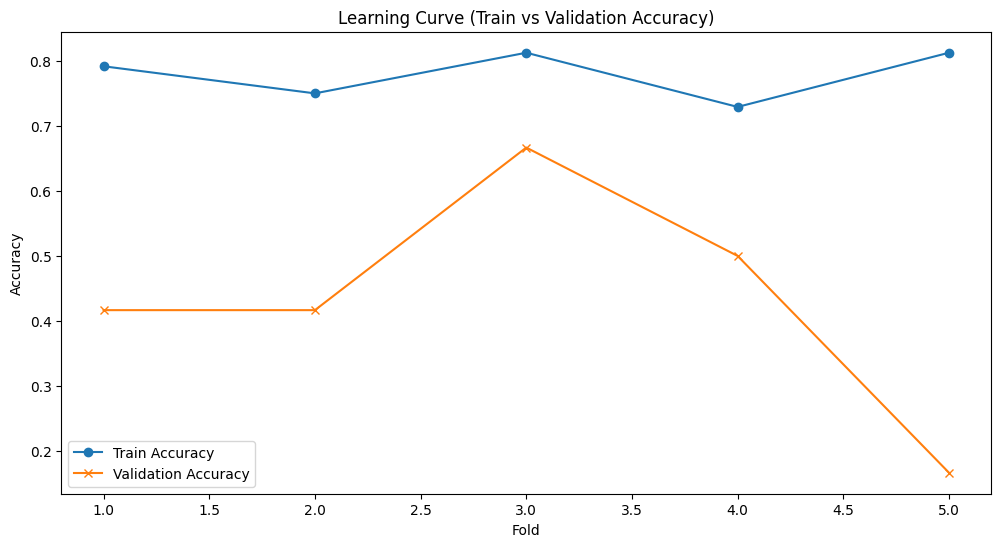

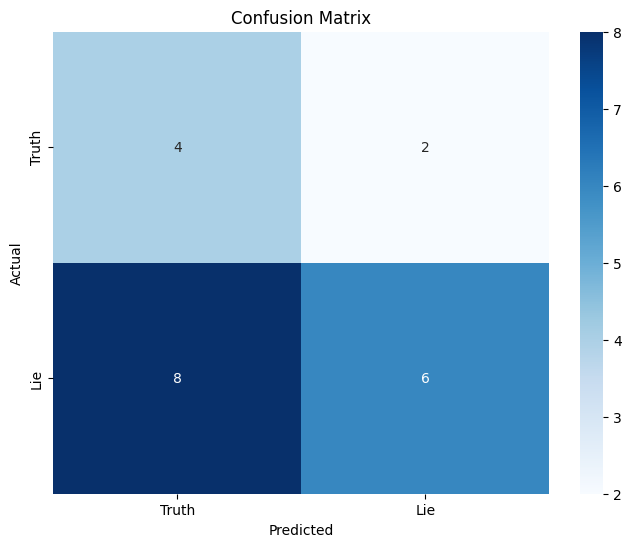

In [178]:
# Model 1: Results

# Plot Learning Curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(validation_accuracies) + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, label='Validation Accuracy', marker='x')
plt.title('Learning Curve (Train vs Validation Accuracy)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix for Test Data
conf_matrix = confusion_matrix(y_test_segments, test_preds_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Truth', 'Lie'], yticklabels=['Truth', 'Lie'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model 2: Convolutional Neural Network


In [179]:
# Model 2: Convolutional Neural Network:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Step 2: Reshape for Conv1D (3D array: [samples, sequence_length, n_channels])
X_train_features = X_train_features.reshape(X_train_features.shape[0], 14, 1)  # 5 features per sample
X_valid_features = X_valid_features.reshape(X_valid_features.shape[0], 14, 1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], 14, 1)

# Step 3: One-hot encode labels for classification
y_train_segments_cat = to_categorical(y_train_segments, num_classes=2)
y_valid_segments_cat = to_categorical(y_valid_segments, num_classes=2)
y_test_segments_cat = to_categorical(y_test_segments, num_classes=2)

# Step 4: Build the CNN model
CNN_model = Sequential()
CNN_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(14, 1)))  # 5 features per sample, 1 channel
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())  # Flatten the output for the dense layer
CNN_model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
CNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Train the model on the entire training set (no need for K-fold here)
cnn_results = CNN_model.fit(X_train_features, y_train_segments_cat,
                             batch_size=64,
                             epochs=40,
                             verbose=1,
                             validation_data=(X_valid_features, y_valid_segments_cat))

# Step 6: Evaluate the model on the test set
test_loss, test_accuracy = CNN_model.evaluate(X_test_features, y_test_segments_cat, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5500 - loss: 8.1225 - val_accuracy: 0.5500 - val_loss: 7.8441
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5500 - loss: 6.7796 - val_accuracy: 0.5500 - val_loss: 6.4659
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5500 - loss: 5.4535 - val_accuracy: 0.5500 - val_loss: 5.1814
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5500 - loss: 4.2295 - val_accuracy: 0.5500 - val_loss: 4.1696
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5500 - loss: 3.3448 - val_accuracy: 0.5500 - val_loss: 3.4840
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6000 - loss: 2.8552 - val_accuracy: 0.5000 - val_loss: 2.8394
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5833 - loss: 2.4512 - val_accuracy: 0.5000 - val_loss: 2.2058
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5333 - loss: 2.0688 - val_accuracy: 0.5000 - val_loss: 1.8611
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Test Accuracy: 0.4
Test Precision: 0.5833333333333334
Test Recall: 0.5
Test F1 Score: 0.5384615384615384


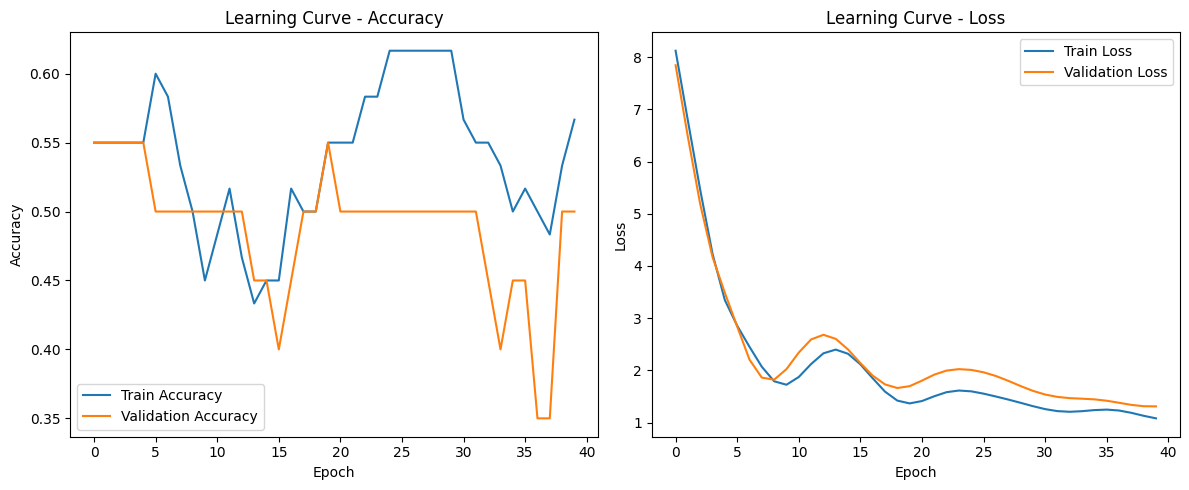

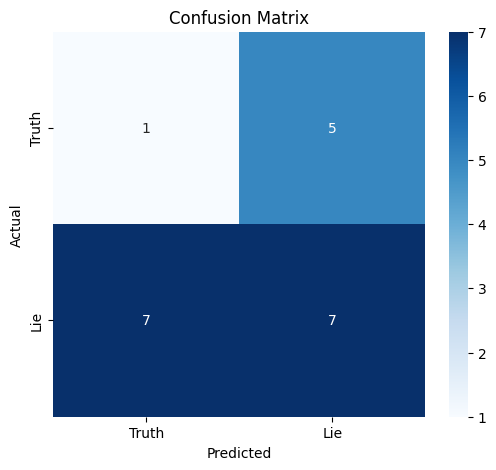

In [180]:
# Model 2: Results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
# Step 7: Predictions for the test set
test_preds_cnn  = CNN_model.predict(X_test_features)
test_preds_cnn  = np.argmax(test_preds_cnn , axis=1)  # Convert from one-hot encoding to labels

# Step 8: Calculate accuracy, recall, precision, and F1 scores
test_accuracy = accuracy_score(y_test_segments, test_preds_cnn )
test_precision = precision_score(y_test_segments, test_preds_cnn )
test_recall = recall_score(y_test_segments, test_preds_cnn )
test_f1 = f1_score(y_test_segments, test_preds_cnn )

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

# Step 9: Plot learning curves (accuracy and loss over epochs)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(cnn_results.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(cnn_results.history['loss'], label='Train Loss')
plt.plot(cnn_results.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 10: Plot confusion matrix
conf_matrix = confusion_matrix(y_test_segments, test_preds_cnn)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Truth', 'Lie'], yticklabels=['Truth', 'Lie'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model 3: Random Forest Classifier

In [182]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
validation_accuracies = []
validation_precision = []
validation_recall = []
validation_f1_scores = []

train_accuracies = []
train_precision = []
train_recall = []
train_f1_scores = []

test_accuracies = []
test_precision = []
test_recall = []
test_f1_scores = []

# Step 2: K-Fold Cross-Validation Loop
for train_index, valid_index in kf.split(X_train_flat):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_valid_fold = X_train_flat[train_index], X_train_flat[valid_index]
    y_train_fold, y_valid_fold = y_train_segments[train_index], y_train_segments[valid_index]

    # Train the model on the current fold
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
    model_rf.fit(X_train_fold, y_train_fold)

    # Predict on the training fold for learning curve
    train_preds = model_rf.predict(X_train_fold)
    train_accuracy = accuracy_score(y_train_fold, train_preds)
    train_precision_score = precision_score(y_train_fold, train_preds, average='weighted')
    train_recall_score = recall_score(y_train_fold, train_preds, average='weighted')
    train_f1 = f1_score(y_train_fold, train_preds, average='weighted')

    # Predict on the validation fold
    validation_preds = model_rf.predict(X_valid_fold)

    # Evaluate accuracy, precision, recall, and F1 score on the validation fold
    validation_accuracy = accuracy_score(y_valid_fold, validation_preds)
    validation_precision_score = precision_score(y_valid_fold, validation_preds, average='weighted')
    validation_recall_score = recall_score(y_valid_fold, validation_preds, average='weighted')
    validation_f1 = f1_score(y_valid_fold, validation_preds, average='weighted')

    # Append metrics
    validation_accuracies.append(validation_accuracy)
    validation_precision.append(validation_precision_score)
    validation_recall.append(validation_recall_score)
    validation_f1_scores.append(validation_f1)

    train_accuracies.append(train_accuracy)
    train_precision.append(train_precision_score)
    train_recall.append(train_recall_score)
    train_f1_scores.append(train_f1)

# Step 3: Evaluate on the test set (after cross-validation)
model_rf.fit(X_train_flat, y_train_segments)  # Retrain on the entire training set
test_preds_rf = model_rf.predict(X_test_flat)

test_accuracy = accuracy_score(y_test_segments, test_preds_rf)
test_precision_score = precision_score(y_test_segments, test_preds_rf, average='weighted')
test_recall_score = recall_score(y_test_segments, test_preds_rf, average='weighted')
test_f1 = f1_score(y_test_segments, test_preds_rf, average='weighted')

test_accuracies.append(test_accuracy)
test_precision.append(test_precision_score)
test_recall.append(test_recall_score)
test_f1_scores.append(test_f1)

# Step 4: Print average results across all folds
print(f"Average Validation Accuracy: {np.mean(validation_accuracies):.4f}")
print(f"Average Validation Precision: {np.mean(validation_precision):.4f}")
print(f"Average Validation Recall: {np.mean(validation_recall):.4f}")
print(f"Average Validation F1 Score: {np.mean(validation_f1_scores):.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision_score:.4f}")
print(f"Test Recall: {test_recall_score:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Average Validation Accuracy: 0.4500
Average Validation Precision: 0.4275
Average Validation Recall: 0.4500
Average Validation F1 Score: 0.4233
Test Accuracy: 0.4000
Test Precision: 0.5524
Test Recall: 0.4000
Test F1 Score: 0.4000


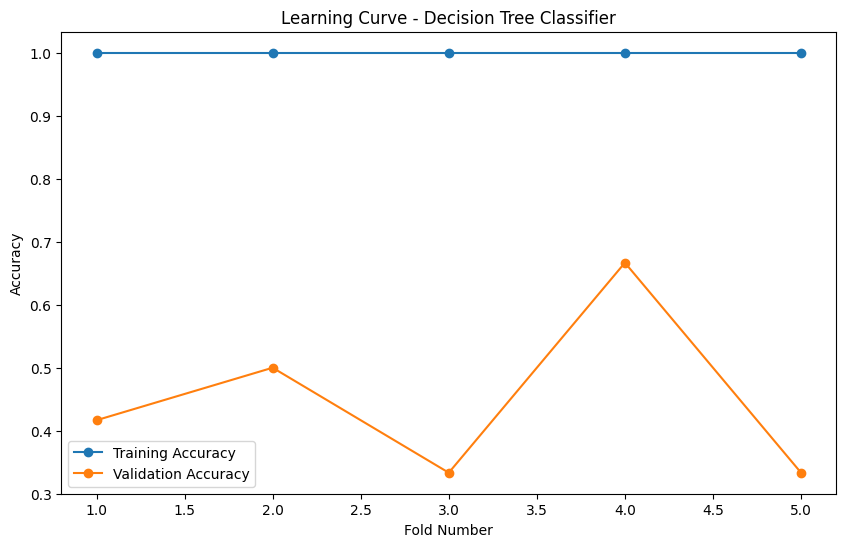

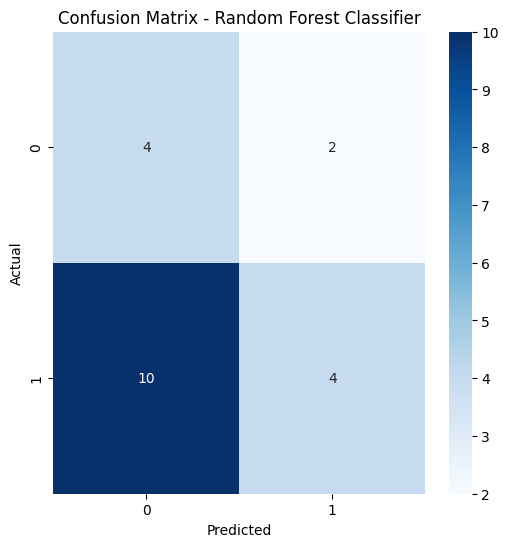

In [183]:
# Model 3: Plot results
# Step 6: Learning Curve (Plot)
plt.figure(figsize=(10,6))
plt.plot(range(1, kf.get_n_splits()+1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, kf.get_n_splits()+1), validation_accuracies, label='Validation Accuracy', marker='o')
plt.title('Learning Curve - Decision Tree Classifier')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 7: Confusion Matrix Heatmap (Test Data)
conf_matrix = confusion_matrix(y_test_segments, test_preds_rf)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model 4: Extra Tree Classifier


In [184]:
# Model 4: Extra Tree Classifier

from sklearn.ensemble import ExtraTreesClassifier

# Step 1: Define your dataset
# Assuming X_train_flat and y_train_segments are already defined
# If they are not, you should have your features and labels ready as numpy arrays

# Step 2: Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
validation_accuracies = []
validation_precision = []
validation_recall = []
validation_f1_scores = []
train_accuracies = []
train_precision = []
train_recall = []
train_f1_scores = []

test_accuracies = []
test_precision = []
test_recall = []
test_f1_scores = []

# Step 3: K-Fold Cross-Validation Loop
for train_index, valid_index in kf.split(X_train_flat):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_valid_fold = X_train_flat[train_index], X_train_flat[valid_index]
    y_train_fold, y_valid_fold = y_train_segments[train_index], y_train_segments[valid_index]

    # Train the model on the current fold (using ExtraTreesClassifier)
    model_et = ExtraTreesClassifier(random_state=42)
    model_et.fit(X_train_fold, y_train_fold)

    # Predict on the training fold for learning curve
    train_preds = model_et.predict(X_train_fold)
    train_accuracy = accuracy_score(y_train_fold, train_preds)
    train_precision_score = precision_score(y_train_fold, train_preds, average='weighted')
    train_recall_score = recall_score(y_train_fold, train_preds, average='weighted')
    train_f1 = f1_score(y_train_fold, train_preds, average='weighted')

    # Predict on the validation fold
    validation_preds = model_et.predict(X_valid_fold)

    # Evaluate accuracy, precision, recall, and F1 score on the validation fold
    validation_accuracy = accuracy_score(y_valid_fold, validation_preds)
    validation_precision_score = precision_score(y_valid_fold, validation_preds, average='weighted')
    validation_recall_score = recall_score(y_valid_fold, validation_preds, average='weighted')
    validation_f1 = f1_score(y_valid_fold, validation_preds, average='weighted')

    validation_accuracies.append(validation_accuracy)
    validation_precision.append(validation_precision_score)
    validation_recall.append(validation_recall_score)
    validation_f1_scores.append(validation_f1)

    train_accuracies.append(train_accuracy)
    train_precision.append(train_precision_score)
    train_recall.append(train_recall_score)
    train_f1_scores.append(train_f1)

# Step 4: Evaluate on the test set (after cross-validation)
test_preds_et = model_et.predict(X_test_flat)
test_accuracy = accuracy_score(y_test_segments, test_preds_et)
test_precision_score = precision_score(y_test_segments, test_preds_et, average='weighted')
test_recall_score = recall_score(y_test_segments, test_preds_et, average='weighted')
test_f1 = f1_score(y_test_segments, test_preds_et, average='weighted')

test_accuracies.append(test_accuracy)
test_precision.append(test_precision_score)
test_recall.append(test_recall_score)
test_f1_scores.append(test_f1)

# Step 5: Print average results across all folds
print(f"Average Validation Accuracy: {np.mean(validation_accuracies)}")
print(f"Average Validation Precision: {np.mean(validation_precision)}")
print(f"Average Validation Recall: {np.mean(validation_recall)}")
print(f"Average Validation F1 Score: {np.mean(validation_f1_scores)}")
print(f"Test Accuracy: {np.mean(test_accuracies)}")
print(f"Test Precision: {np.mean(test_precision)}")
print(f"Test Recall: {np.mean(test_recall)}")
print(f"Test F1 Score: {np.mean(test_f1_scores)}")


Average Validation Accuracy: 0.5166666666666667
Average Validation Precision: 0.5495238095238095
Average Validation Recall: 0.5166666666666667
Average Validation F1 Score: 0.5001894401894402
Test Accuracy: 0.35
Test Precision: 0.5549019607843138
Test Recall: 0.35
Test F1 Score: 0.2951406649616368


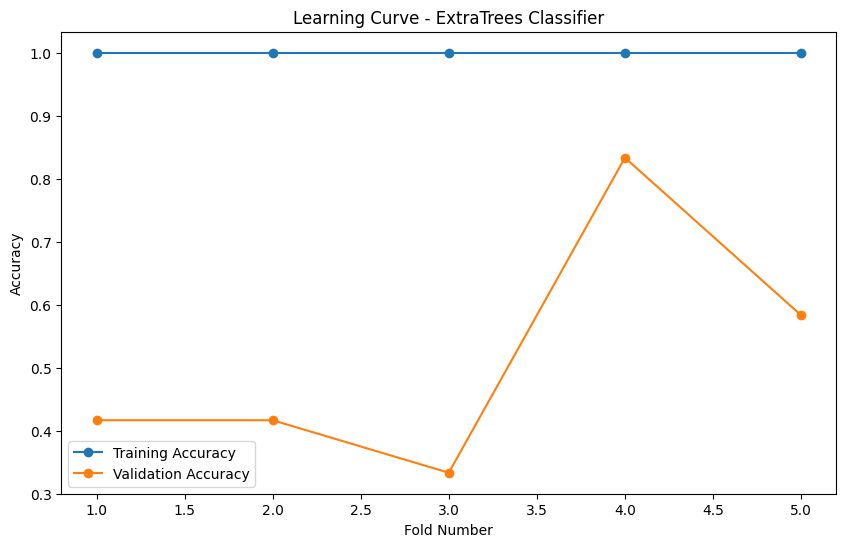

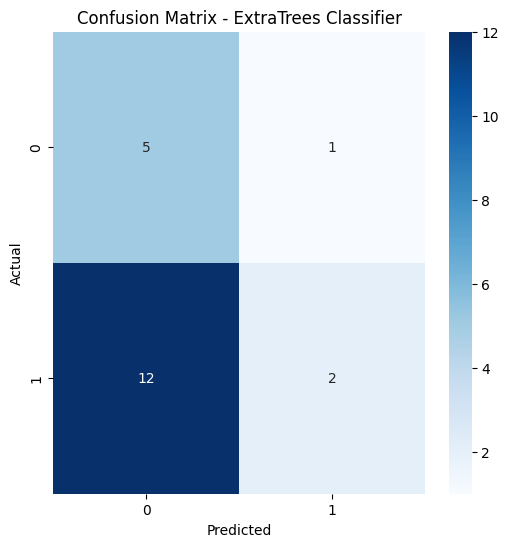

In [185]:
# Model 4: Results

# Step 6: Learning Curve (Plot)
plt.figure(figsize=(10,6))
plt.plot(range(1, kf.get_n_splits()+1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, kf.get_n_splits()+1), validation_accuracies, label='Validation Accuracy', marker='o')
plt.title('Learning Curve - ExtraTrees Classifier')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 7: Confusion Matrix Heatmap (Test Data)
conf_matrix = confusion_matrix(y_test_segments, test_preds_et)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix - ExtraTrees Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model 5: k-NN classifier

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a range of k values (you can adjust this range as needed)
k_values = range(1, 21)  # Searching for k from 1 to 20
best_k = None
best_accuracy = 0

# Loop through each k value and evaluate the model
for k in k_values:
    print(f"Training kNN model with k={k}...")

    # Create the kNN model
    model_knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')

    # Train the model with the training data
    model_knn.fit(X_train_flat, y_train_segments)

    # Make predictions on the validation set
    y_valid_pred = model_knn.predict(X_valid_flat)

    # Calculate accuracy on the validation set
    validation_accuracy = accuracy_score(y_valid_segments, y_valid_pred)

    print(f"Validation Accuracy for k={k}: {validation_accuracy:.4f}")

    # Update best k if current accuracy is higher than the previous best
    if validation_accuracy > best_accuracy:
        best_k = k
        best_accuracy = validation_accuracy

# After finding the best k, train the model on the full training set
print(f"The best k value is {best_k} with validation accuracy of {best_accuracy:.4f}")

# Train the final model with the best k
final_model_knn = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute')
final_model_knn.fit(X_train_flat, y_train_segments)

# Evaluate on test data
test_preds_knn  = final_model_knn.predict(X_test_flat)
test_accuracy = accuracy_score(y_test_segments, test_preds_knn )
print(f"Test Accuracy with k={best_k}: {test_accuracy:.4f}")



Training kNN model with k=1...
Validation Accuracy for k=1: 0.4500
Training kNN model with k=2...
Validation Accuracy for k=2: 0.4500
Training kNN model with k=3...
Validation Accuracy for k=3: 0.3500
Training kNN model with k=4...
Validation Accuracy for k=4: 0.4500
Training kNN model with k=5...
Validation Accuracy for k=5: 0.4500
Training kNN model with k=6...
Validation Accuracy for k=6: 0.5500
Training kNN model with k=7...
Validation Accuracy for k=7: 0.5500
Training kNN model with k=8...
Validation Accuracy for k=8: 0.5000
Training kNN model with k=9...
Validation Accuracy for k=9: 0.5000
Training kNN model with k=10...
Validation Accuracy for k=10: 0.5500
Training kNN model with k=11...
Validation Accuracy for k=11: 0.5500
Training kNN model with k=12...
Validation Accuracy for k=12: 0.5500
Training kNN model with k=13...
Validation Accuracy for k=13: 0.5000
Training kNN model with k=14...
Validation Accuracy for k=14: 0.5000
Training kNN model with k=15...
Validation Accuracy 

 ## Combining models: Voting classifier



In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming test_preds_svm, test_preds_cnn, test_preds_rf, test_preds_et, and test_preds_knn are already defined
# Ensure all predictions are numpy arrays
test_preds_svm = np.array(test_preds_svm)
test_preds_cnn = np.array(test_preds_cnn)
# test_preds_rf = np.array(test_preds_rf)# Exclude- low performance
test_preds_et = np.array(test_preds_et)
# test_preds_knn = np.array(test_preds_knn) # Exclude- low performance


# Assuming y_test_segments is already defined as the ground truth for the test set
y_test_segments = np.array(y_test_segments)  # Ensure ground truth is also a numpy array

# Step 1: Combine predictions for hard voting
# Stack predictions vertically and take the majority vote for each sample
all_test_preds = np.vstack([test_preds_svm, test_preds_cnn, test_preds_et])
combined_test_preds = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_test_preds)

# Step 2: Evaluate the combined predictions
test_accuracy = accuracy_score(y_test_segments, combined_test_preds)
test_precision = precision_score(y_test_segments, combined_test_preds, average='weighted')
test_recall = recall_score(y_test_segments, combined_test_preds, average='weighted')
test_f1 = f1_score(y_test_segments, combined_test_preds, average='weighted')

# Step 3: Print results
print("Combined Model Test Results:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


Combined Model Test Results:
Accuracy: 0.4500
Precision: 0.6600
Recall: 0.4500
F1 Score: 0.4376


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


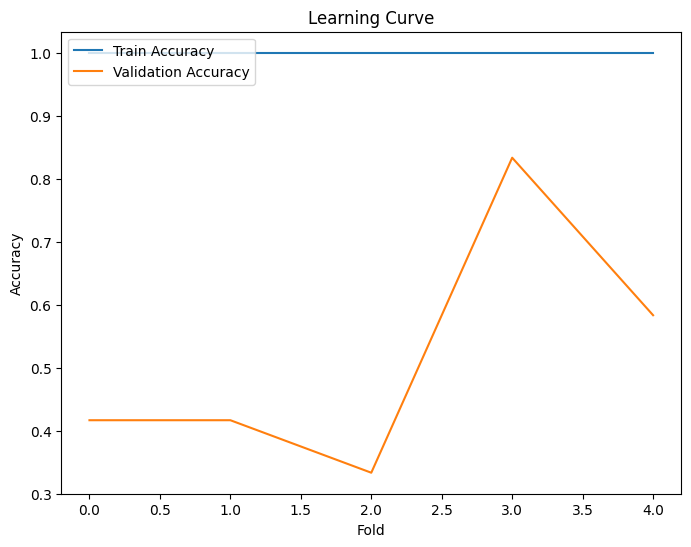

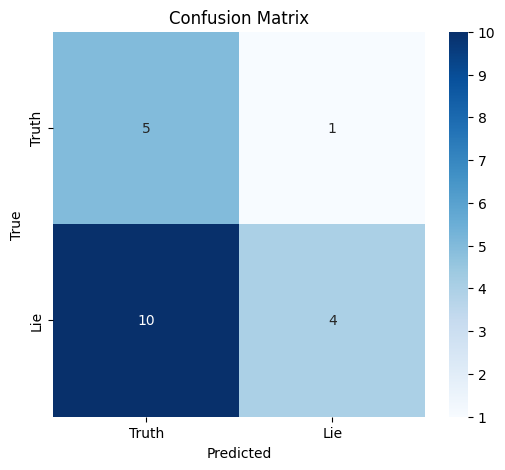

In [189]:
# Plot learning curve for training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(len(train_accuracies)), train_accuracies, label='Train Accuracy')
plt.plot(range(len(validation_accuracies)), validation_accuracies, label='Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='upper left')
plt.show()

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test_segments, combined_test_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Truth', 'Lie'], yticklabels=['Truth', 'Lie'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 7 Conclusions

In this project, we explored several machine learning models to predict whether an audio recording of a narrative is a lie or a truth. The models tested included SVM, CNN, Extra Trees, KNN, Random Forest, and a combined voting model.

The individual models showed varied performance, with SVM and CNN performing moderately better than others. The SVM model achieved a test accuracy of 0.55, while the CNN model showed a test accuracy of 0.45. The Extra Trees and Random Forest models, despite their complex ensemble nature, performed poorly, with test accuracies of 0.35 and 0.50, respectively. The KNN model provided the highest validation accuracy at 0.60 but struggled with a drop to 0.50 on the test set.

It is important to consider that we did not expect a high accuracy, given the size of the dataset and the limitations to how specific the type of data was. However, all of the accuracy values extracted are low, considering that the probability of guessing whether a story is deceptive or not by chance is 1/2=50%. Hence, we would expect the model to be able to perform better than what a random guess would predict.

Nonetheless, the combined model, excluding KNN and Random Forest due to their low accuracy, showed an overall improvement in performance, with a test accuracy of 0.45 and an F1 score of 0.37. However, this combined model still has significant room for improvement, particularly in terms of generalization to unseen data.

Limitations:

- Lying is easy: Predicting deception is inherently difficult, as lies are often wrapped in truthful information. Liars tend to mix lies with truths, which can mislead models trained to detect deception.
- Othello error: Truth-tellers might be as nervous as liars, leading to misclassification. This error is smaller in this context because the stakes in storytelling (deceptive or truthful) are lower.
- Random chance: If we selected a sample randomly, we would have a 50% chance of correctly identifying whether the story is true or a lie, which highlights the inherent challenge of detecting deception from audio alone.

In conclusion, while the models showed some promising results, improvements are needed, particularly in model generalization, feature extraction, and handling the complexity of deception in speech. Further optimization of models like SVM and CNN, along with additional data or feature refinement, may enhance predictive performance.

As suggestions for future models, it would be interesting to explore the possiblitiy of doing an exploratory analysis on the 30 second audio files. That is, instead of extracting predetermined features, the model could identify common patterns in the data, which then could be interpreted and tested on the new, unseen test data. Similarly, exploring unsupervised methods could allow to identify more labels than whether the story was true or false.

In line with the initial hypothesis of this model, it is possible that using other methods could perhaps allow a differentiation between 'good' and 'bad' liars. That is, it could be explored whether the model can group stories into those from individuals that showed physical (audio) signs of deception and those that were good liars, and therefore their corresponding 30 second audio recordings show similar features as those of individuals who are telling the truth.


# 8 References

1. Ameya Ajit Mande. (2019). EMOTION DETECTION USING AUDIO DATA SAMPLES. International Journal of Advanced Research in Computer Science, 10(6), 13–20. https://doi.org/10.26483/ijarcs.v10i6.6489

2. Anolli, L., & Ciceri, R. (1997). THE VOICE OF DECEPTION: VOCAL STRATEGIES OF NAIVE AND ABLE LIARS. Journal of Nonverbal Behavior, 21(4), 259–284. https://doi.org/10.1023/a:1024916214403
3. Eitan Elaad. (2014). Covert Detection of Deception. 315–338. https://doi.org/10.1002/9781118510001.ch14

4. Erro, D., Sainz, I., Saratxaga, I., Navas, E., & Hernáez, I. (n.d.). MFCC+F0 Extraction and Waveform Reconstruction using HNM: Preliminary Results in an HMM-based Synthesizer. Retrieved December 6, 2024, from http://lorien.die.upm.es/~lapiz/rtth/JORNADAS/VI/pdfs/0003.pdf

5. Gupta, P. (2024, July 18). Splitting Audio Files into Manageable Segments with Python. Medium. https://medium.com/@purushottamgupta2010/splitting-audio-files-into-manageable-segments-with-python-890aba53d254

6. Hauch, V., Blandón-Gitlin, I., Masip, J., & Sporer, S. L. (2014). Are Computers Effective Lie Detectors? A Meta-Analysis of Linguistic Cues to Deception. Personality and Social Psychology Review, 19(4), 307–342. https://doi.org/10.1177/1088868314556539

7. Hegde, S., Shetty, S., Rai, S., & Dodderi, T. (2018). A Survey on Machine Learning Approaches for Automatic Detection of Voice Disorders. Journal of Voice. https://doi.org/10.1016/j.jvoice.2018.07.014

8. Vrij, A., Granhag, P. A., & Porter, S. (2010). Pitfalls and Opportunities in Nonverbal and Verbal Lie Detection. Psychological Science in the Public Interest, 11(3), 89–121. https://doi.org/10.1177/1529100610390861
